<a href="https://colab.research.google.com/github/eliecruz/CCDEPLRL_EXERCISES_-COM211-/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

In [2]:
tokenizer = Tokenizer()
data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [3]:
model = Sequential()
model.add(Embedding(total_words, 155, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(375)))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 155)           523125    
                                                                 
 bidirectional (Bidirection  (None, 750)               1593000   
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 750)               0         
                                                                 
 dense (Dense)               (None, 3375)              2534625   
                                                                 
Total params: 4650750 (17.74 MB)
Trainable params: 4650750 (17.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
 history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 22s 24ms/step - loss: 6.8226 - accuracy: 0.0245
Epoch 2/50
484/484 [==============================] - 4s 8ms/step - loss: 6.3865 - accuracy: 0.0371
Epoch 3/50
484/484 [==============================] - 5s 9ms/step - loss: 6.1001 - accuracy: 0.0508
Epoch 4/50
484/484 [==============================] - 4s 9ms/step - loss: 5.7725 - accuracy: 0.0628
Epoch 5/50
484/484 [==============================] - 4s 9ms/step - loss: 5.3522 - accuracy: 0.0812
Epoch 6/50
484/484 [==============================] - 5s 10ms/step - loss: 4.8426 - accuracy: 0.1082
Epoch 7/50
484/484 [==============================] - 4s 8ms/step - loss: 4.2135 - accuracy: 0.1607
Epoch 8/50
484/484 [==============================] - 4s 8ms/step - loss: 3.5351 - accuracy: 0.2564
Epoch 9/50
484/484 [==============================] - 4s 9ms/step - loss: 2.8960 - accuracy: 0.3737
Epoch 10/50
484/484 [==============================] - 4s 8ms/step - loss: 2.3715 - accuracy: 0.4

In [7]:
history2 = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5540 - accuracy: 0.8504
Epoch 2/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5559 - accuracy: 0.8497
Epoch 3/50
484/484 [==============================] - 5s 10ms/step - loss: 0.5626 - accuracy: 0.8487
Epoch 4/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5571 - accuracy: 0.8481
Epoch 5/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5541 - accuracy: 0.8495
Epoch 6/50
484/484 [==============================] - 4s 9ms/step - loss: 0.5502 - accuracy: 0.8498
Epoch 7/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5484 - accuracy: 0.8506
Epoch 8/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5436 - accuracy: 0.8491
Epoch 9/50
484/484 [==============================] - 4s 9ms/step - loss: 0.5458 - accuracy: 0.8489
Epoch 10/50
484/484 [==============================] - 4s 8ms/step - loss: 0.5503 - accuracy: 0.851

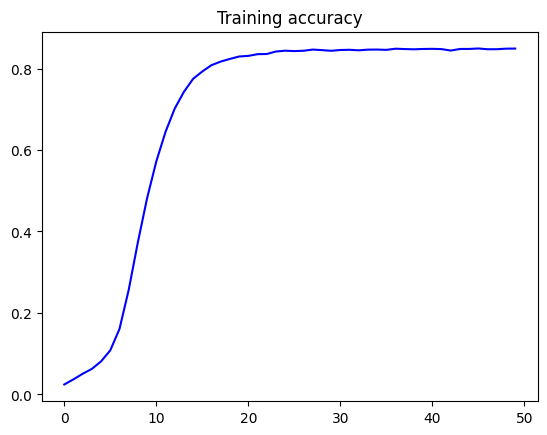

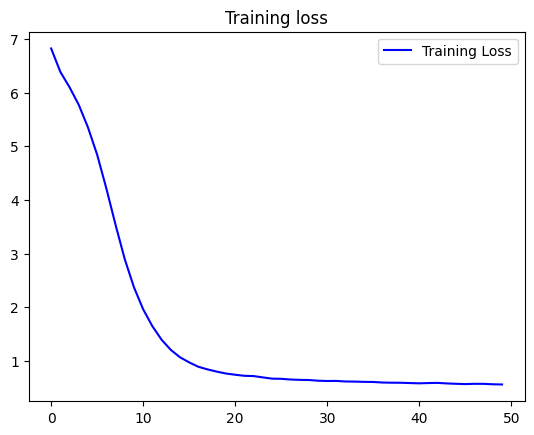

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [9]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 29ms/step
Help me Obi Wan Kenobi, you're my only hope as foes still rare rare ' find hate tender whom a date day hath not every name are free so deem'd gone so live kind and he may be ' thought hence audit parts ' ' ' ' excuse you am old treasure ' may say find thee bright again me ' ' win say me warning back again and i be hence crime ' thought woe hate' he shows churl go well a give thee that ' ' say ' so live men thou art true and in thee thy self all hate away on truth sorrow sorrow stand
